**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
#from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
df = pd.read_csv('CC GENERAL.csv')


In [3]:
df.sample(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6353,C16528,964.099980,1.000000,1074.96,0.0,1074.96,0.000000,1.000000,0.0,1.000000,0.000000,0,12,1000.0,446.368432,1192.827241,0.000,12
5060,C15202,58.313733,0.454545,499.00,0.0,499.00,0.000000,0.545455,0.0,0.454545,0.000000,0,6,1500.0,526.368079,76.744713,0.125,11
8893,C19134,367.263145,1.000000,280.00,0.0,280.00,254.298735,1.000000,0.0,0.857143,0.142857,1,7,1000.0,64.596029,137.819399,0.000,7


In [4]:
df=df.drop('CUST_ID',axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df.sample(30)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3850,874.571604,1.000000,385.70,316.70,69.00,289.822557,0.416667,0.333333,0.166667,0.166667,2,8,2000.0,357.969443,231.854555,0.000000,12
1360,1186.928037,1.000000,2178.00,1546.50,631.50,0.000000,1.000000,1.000000,0.333333,0.000000,0,28,7000.0,2565.252377,300.082054,0.000000,12
8870,100.427621,1.000000,793.28,0.00,793.28,0.000000,1.000000,0.000000,0.875000,0.000000,0,8,1000.0,679.031744,117.258435,1.000000,8
6440,846.091011,1.000000,2599.20,1212.28,1386.92,0.000000,0.916667,0.333333,0.916667,0.000000,0,19,3000.0,1900.699307,195.516066,0.000000,12
7624,722.404832,0.909091,0.00,0.00,0.00,1356.687002,0.000000,0.000000,0.000000,0.333333,5,0,1500.0,215.857868,273.525420,0.000000,12
252,19.508047,1.000000,193.14,0.00,193.14,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,2000.0,220.463770,71.965063,0.250000,12
467,52.229659,1.000000,565.50,0.00,565.50,101.137379,1.000000,0.000000,1.000000,0.083333,1,14,8500.0,2768.795805,199.803721,0.250000,12
932,3122.171879,1.000000,974.30,712.30,262.00,189.408446,0.750000,0.583333,0.416667,0.416667,5,21,3000.0,1520.760286,2019.977973,0.000000,12
8940,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.000000,6
1164,20.889413,0.636364,244.20,0.00,244.20,0.000000,0.333333,0.000000,0.250000,0.000000,0,4,4000.0,541.817138,72.261438,0.000000,12


In [9]:
df.fillna(0, inplace = True)

In [10]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
df[df['MINIMUM_PAYMENTS'] == 0].head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.0,0.0,0.0,12
45,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.0,0.0,0.0,12
47,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.0,0.0,0.0,12


In [17]:
# Standardize data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Normalizing the Data
normalized_df = normalize(scaled_df)

# Converting the numpy array into a pandas DataFrame
normalized_df = pd.DataFrame(normalized_df)

# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head(2)

,P1,P2
0,-0.490758,-0.679041
1,-0.518463,0.545356


**Dendograms are used to divide a given cluster into many different clusters.(Using sklearn, you can decide how many divison of clusters you want in your model**

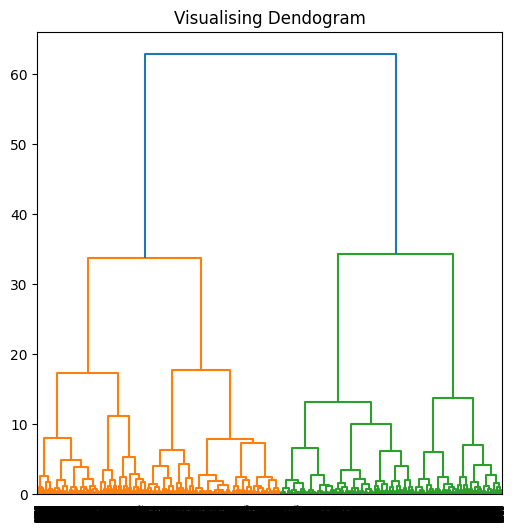

In [18]:
plt.figure(figsize =(6, 6))
plt.title('Visualising Dendogram')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

**For 3 clusters**

In [19]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

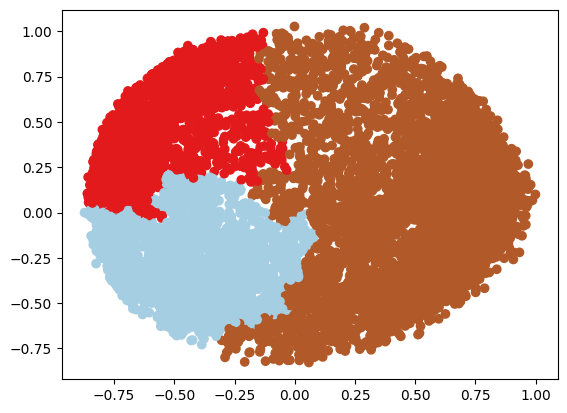

In [28]:
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap ='Paired_r')
plt.show()

**For 5 clusters**

In [24]:
aggB = AgglomerativeClustering(n_clusters=5)
aggB.fit(X_principal)

AgglomerativeClustering(n_clusters=5)

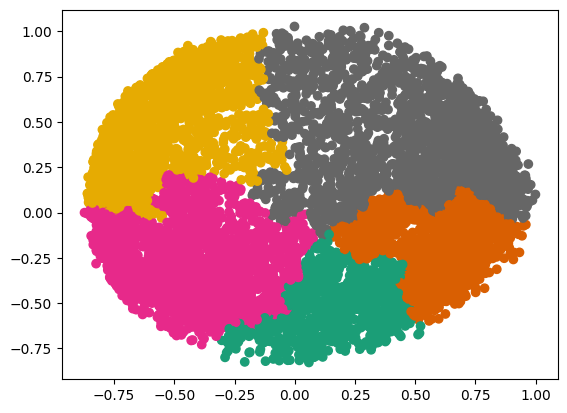

In [27]:
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = AgglomerativeClustering(n_clusters = 5).fit_predict(X_principal), cmap='Dark2_r')
plt.show()

**Final Note**
Thus, we have analysed Customer data and performed Hierarchical Clustering using Agglomerative Clustering Algorithm. This kind of cluster analysis helps design better customer acquisition strategies and helps in business growth.